## Construcción de un modelo CNN con muy pocos datos
### Parte 1 - entrenar desde cero

In [14]:
# De:
# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

In [3]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras import optimizers, regularizers
from keras.callbacks import ModelCheckpoint

import matplotlib.pyplot as plt
import numpy as np

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

%matplotlib inline

Using TensorFlow backend.


In [1]:
# dimensions of our images.
img_width, img_height = 150, 150
#img_width, img_height = 20, 20

In [17]:
aux = '_' + str(img_width) + 'x' + str(img_height) + '.npy'
print('leyendo mi_Xtr'+aux+'...')
Xtr = np.load('mi_Xtr'+aux)
print('leyendo mi_Xva'+aux+'...')
Xva = np.load('mi_Xva'+aux)
print('leyendo mi_Xte'+aux+'...')
Xte = np.load('mi_Xte'+aux)
print('leyendo mi_ytr.npy, mi_yva.npy, mi_yte.npy ...')
ytr = np.load('mi_ytr.npy')
yva = np.load('mi_yva.npy')
yte = np.load('mi_yte.npy')

leyendo mi_Xtr_150x150.npy...
leyendo mi_Xva_150x150.npy...
leyendo mi_Xte_150x150.npy...
leyendo mi_ytr.npy, mi_yva.npy, mi_yte.npy ...


In [5]:
print(Xtr.shape)
print(Xva.shape)
print(Xte.shape)

(2000, 150, 150, 3)
(802, 150, 150, 3)
(2002, 150, 150, 3)


In [4]:
# Definicion del modelo

input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
# aqui empieza la red neuronal 'standard'
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
#              optimizer=optimizers.RMSprop(lr=1e-4),
              optimizer=optimizers.RMSprop(),
              metrics=['acc'])

AttributeError: module 'tensorflow' has no attribute 'get_default_graph'

In [7]:
ytr

array([1, 1, 1, ..., 0, 0, 0])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)             0         
__________

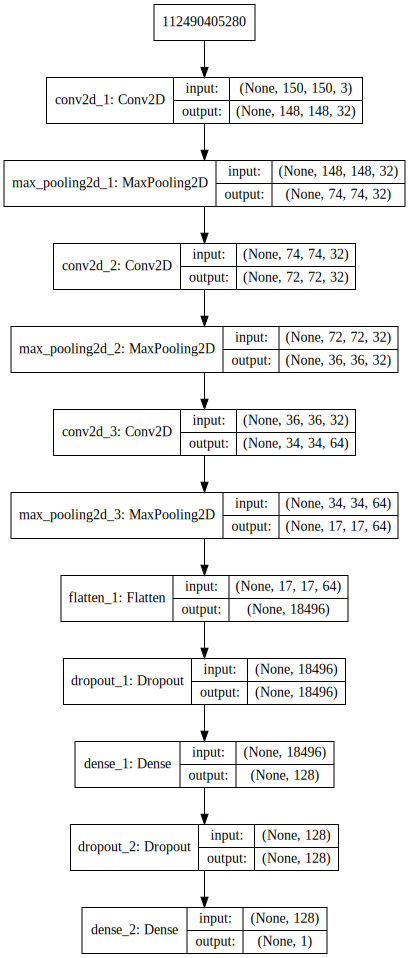

In [8]:
model.summary()
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [9]:
from matplotlib.ticker import MaxNLocator

def grafica_entrenamiento(tr_acc, val_acc):
    ax=plt.figure(figsize=(10,4)).gca()
    plt.plot(1+np.arange(len(tr_acc)), 100*np.array(tr_acc))
    plt.plot(1+np.arange(len(val_acc)), 100*np.array(val_acc))
    plt.title('tasa de acierto del modelo (%)', fontsize=18)
    plt.ylabel('tasa de acierto (%)', fontsize=18)
    plt.xlabel('epoca', fontsize=18)
    plt.legend(['entrenamiento', 'validacion'], loc='upper left')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.show()

In [10]:
acum_tr_acc = []
acum_val_acc = []

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 35s 17ms/step - loss: 0.6990 - acc: 0.5385 - val_loss: 0.6763 - val_acc: 0.5786

Epoch 00001: val_acc improved from -inf to 0.57855, saving model to model_current_best_parte1.h5
Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 33s 17ms/step - loss: 0.6351 - acc: 0.6525 - val_loss: 0.6199 - val_acc: 0.6534

Epoch 00001: val_acc improved from 0.57855 to 0.65337, saving model to model_current_best_parte1.h5


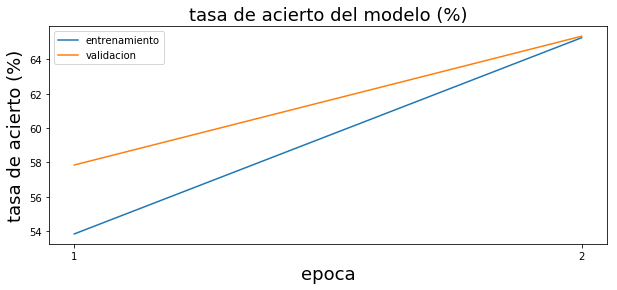

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 33s 17ms/step - loss: 0.5850 - acc: 0.7020 - val_loss: 0.5784 - val_acc: 0.6758

Epoch 00001: val_acc improved from 0.65337 to 0.67581, saving model to model_current_best_parte1.h5


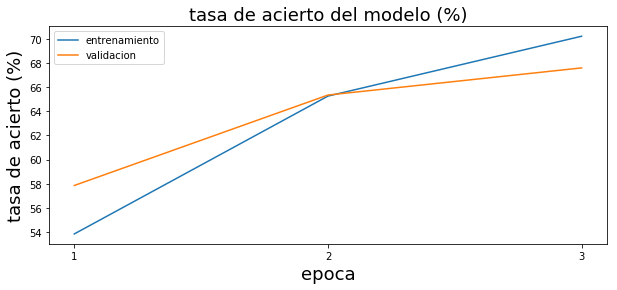

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 33s 17ms/step - loss: 0.5363 - acc: 0.7365 - val_loss: 0.5750 - val_acc: 0.6808

Epoch 00001: val_acc improved from 0.67581 to 0.68080, saving model to model_current_best_parte1.h5


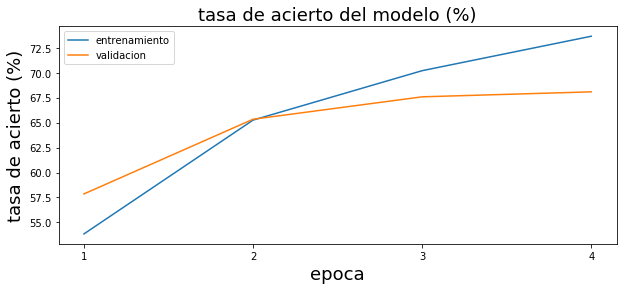

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 33s 17ms/step - loss: 0.5107 - acc: 0.7605 - val_loss: 0.5849 - val_acc: 0.7145

Epoch 00001: val_acc improved from 0.68080 to 0.71446, saving model to model_current_best_parte1.h5


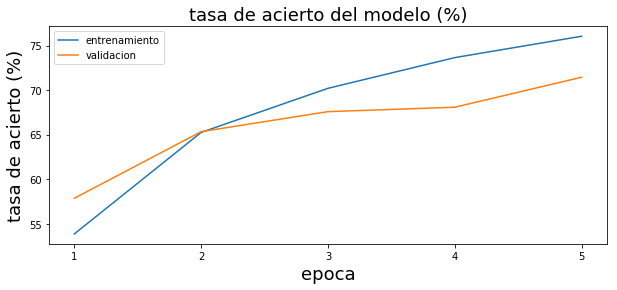

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 33s 17ms/step - loss: 0.4621 - acc: 0.7935 - val_loss: 0.6132 - val_acc: 0.7095

Epoch 00001: val_acc did not improve from 0.71446


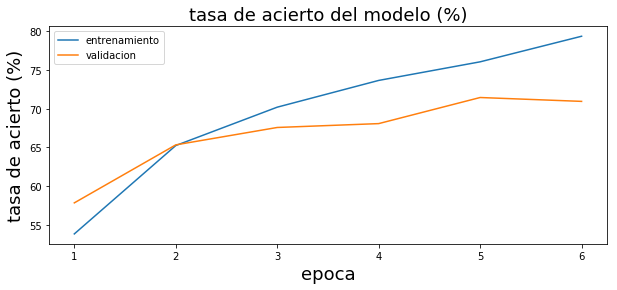

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 33s 17ms/step - loss: 0.4156 - acc: 0.8125 - val_loss: 0.6027 - val_acc: 0.7007

Epoch 00001: val_acc did not improve from 0.71446


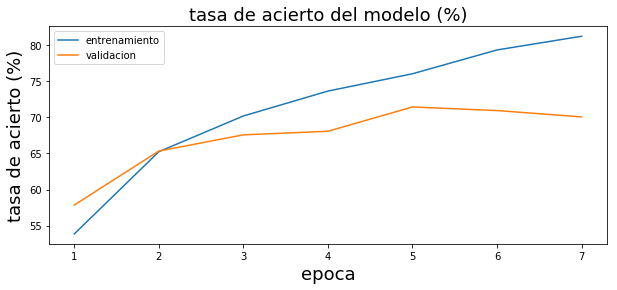

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 33s 17ms/step - loss: 0.3940 - acc: 0.8340 - val_loss: 0.6171 - val_acc: 0.7207

Epoch 00001: val_acc improved from 0.71446 to 0.72070, saving model to model_current_best_parte1.h5


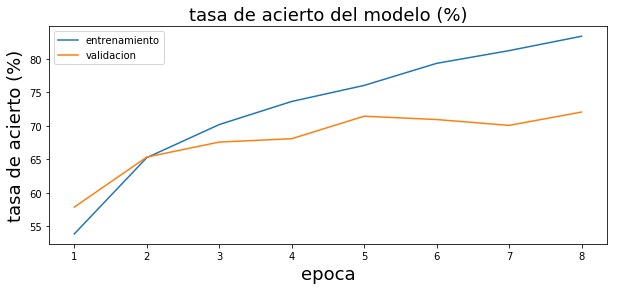

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 34s 17ms/step - loss: 0.3580 - acc: 0.8445 - val_loss: 0.6705 - val_acc: 0.7232

Epoch 00001: val_acc improved from 0.72070 to 0.72319, saving model to model_current_best_parte1.h5


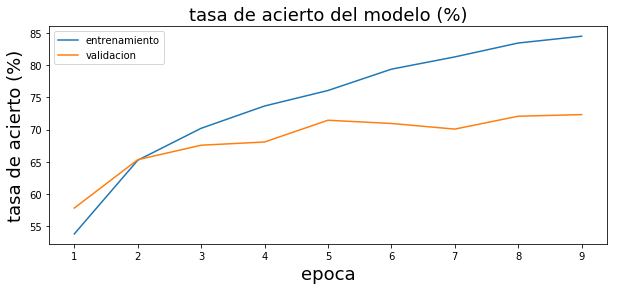

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 33s 17ms/step - loss: 0.3256 - acc: 0.8640 - val_loss: 0.6388 - val_acc: 0.7282

Epoch 00001: val_acc improved from 0.72319 to 0.72818, saving model to model_current_best_parte1.h5


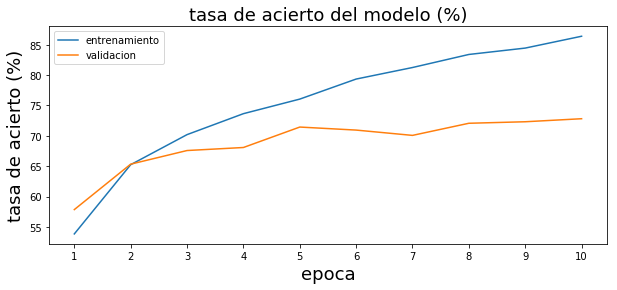

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 33s 17ms/step - loss: 0.3179 - acc: 0.8680 - val_loss: 0.6310 - val_acc: 0.7531

Epoch 00001: val_acc improved from 0.72818 to 0.75312, saving model to model_current_best_parte1.h5


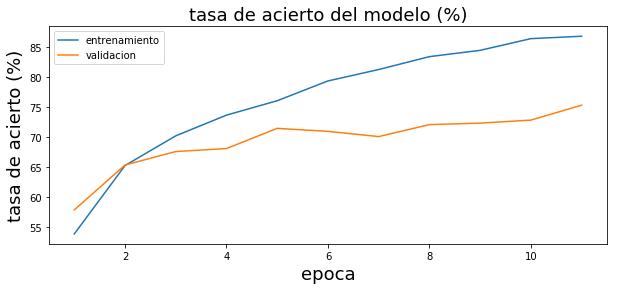

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 34s 17ms/step - loss: 0.2799 - acc: 0.8855 - val_loss: 0.8118 - val_acc: 0.6933

Epoch 00001: val_acc did not improve from 0.75312


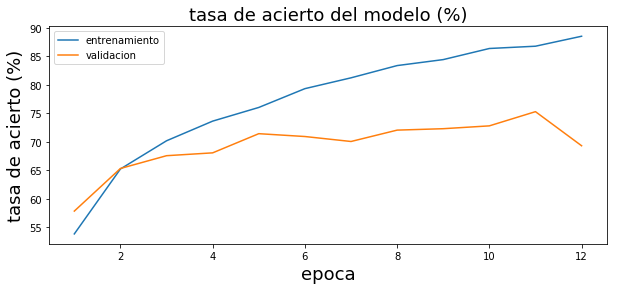

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 34s 17ms/step - loss: 0.2675 - acc: 0.8900 - val_loss: 0.7945 - val_acc: 0.7307

Epoch 00001: val_acc did not improve from 0.75312


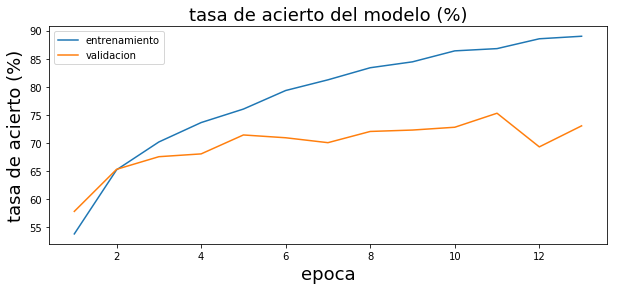

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 33s 17ms/step - loss: 0.2504 - acc: 0.9075 - val_loss: 0.7082 - val_acc: 0.7481

Epoch 00001: val_acc did not improve from 0.75312


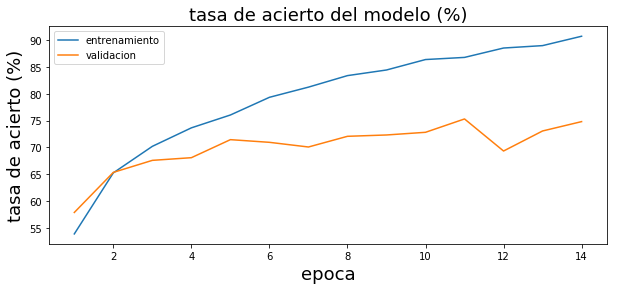

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 34s 17ms/step - loss: 0.2213 - acc: 0.9115 - val_loss: 0.9017 - val_acc: 0.7120

Epoch 00001: val_acc did not improve from 0.75312


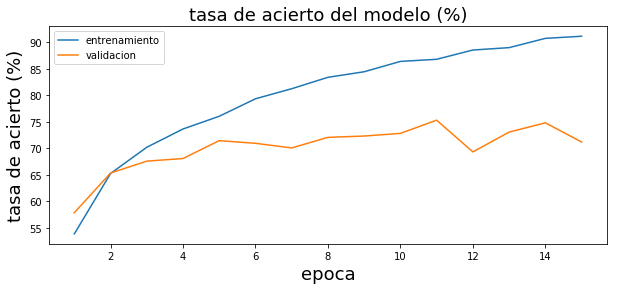

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 34s 17ms/step - loss: 0.1955 - acc: 0.9280 - val_loss: 0.8156 - val_acc: 0.7519

Epoch 00001: val_acc did not improve from 0.75312


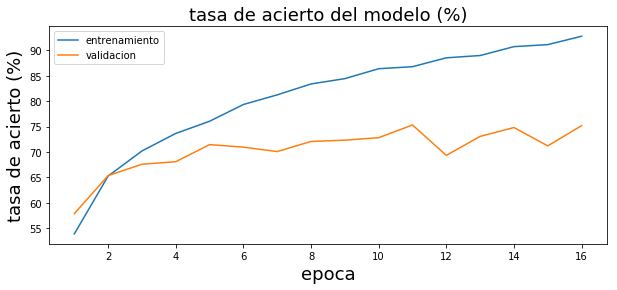

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 34s 17ms/step - loss: 0.2203 - acc: 0.9165 - val_loss: 0.9401 - val_acc: 0.7444

Epoch 00001: val_acc did not improve from 0.75312


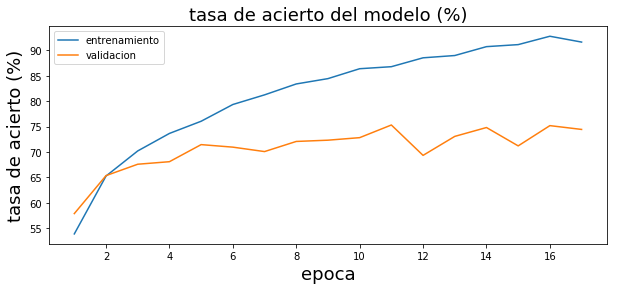

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 34s 17ms/step - loss: 0.2103 - acc: 0.9160 - val_loss: 1.1126 - val_acc: 0.7269

Epoch 00001: val_acc did not improve from 0.75312


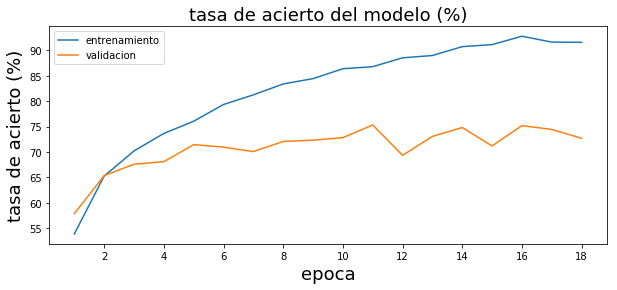

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 1091s 546ms/step - loss: 0.1818 - acc: 0.9325 - val_loss: 1.0362 - val_acc: 0.7556

Epoch 00001: val_acc improved from 0.75312 to 0.75561, saving model to model_current_best_parte1.h5


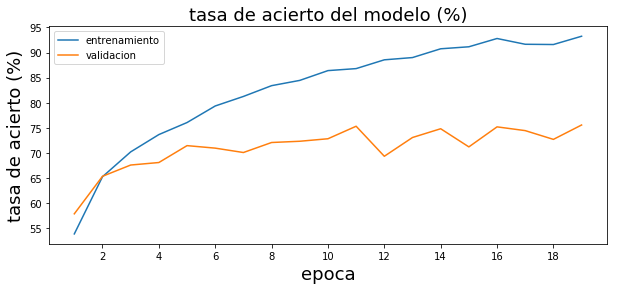

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 39s 20ms/step - loss: 0.1632 - acc: 0.9455 - val_loss: 0.9534 - val_acc: 0.7581

Epoch 00001: val_acc improved from 0.75561 to 0.75810, saving model to model_current_best_parte1.h5


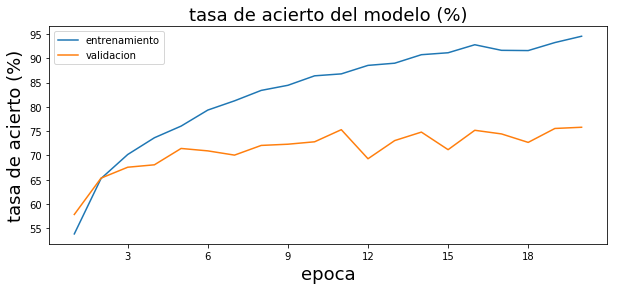

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 41s 20ms/step - loss: 0.1701 - acc: 0.9410 - val_loss: 1.0251 - val_acc: 0.7581

Epoch 00001: val_acc did not improve from 0.75810


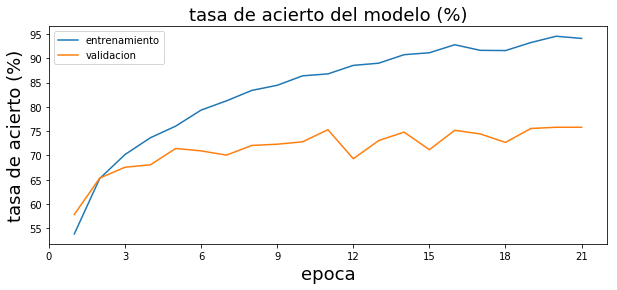

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 45s 22ms/step - loss: 0.1698 - acc: 0.9315 - val_loss: 1.0280 - val_acc: 0.7681

Epoch 00001: val_acc improved from 0.75810 to 0.76808, saving model to model_current_best_parte1.h5


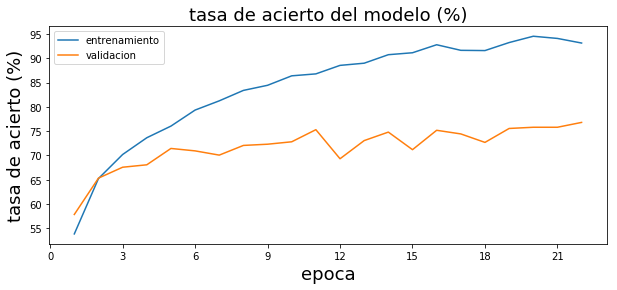

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 51s 25ms/step - loss: 0.1405 - acc: 0.9490 - val_loss: 1.1527 - val_acc: 0.7319

Epoch 00001: val_acc did not improve from 0.76808


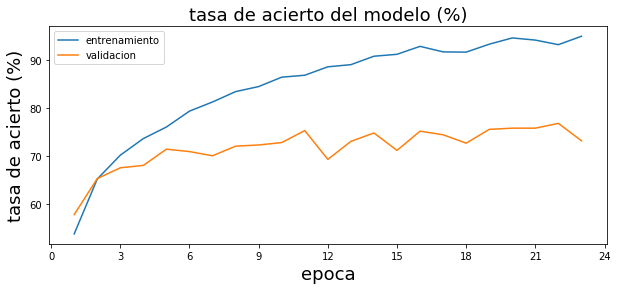

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 41s 21ms/step - loss: 0.1501 - acc: 0.9420 - val_loss: 1.2132 - val_acc: 0.7643

Epoch 00001: val_acc did not improve from 0.76808


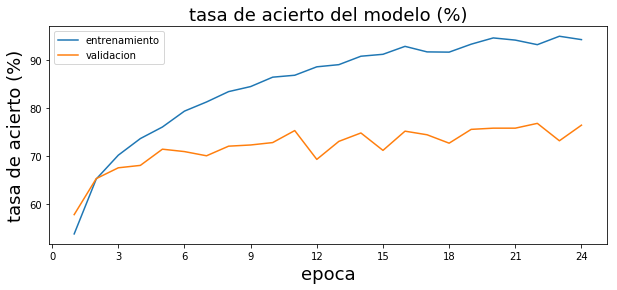

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 42s 21ms/step - loss: 0.1526 - acc: 0.9415 - val_loss: 1.0674 - val_acc: 0.7506

Epoch 00001: val_acc did not improve from 0.76808


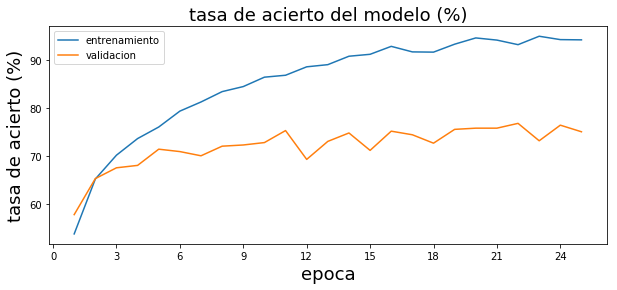

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 42s 21ms/step - loss: 0.1381 - acc: 0.9505 - val_loss: 1.1369 - val_acc: 0.7581

Epoch 00001: val_acc did not improve from 0.76808


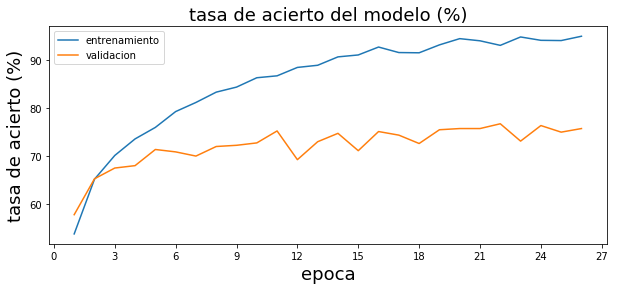

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 42s 21ms/step - loss: 0.1532 - acc: 0.9465 - val_loss: 1.2920 - val_acc: 0.7469

Epoch 00001: val_acc did not improve from 0.76808


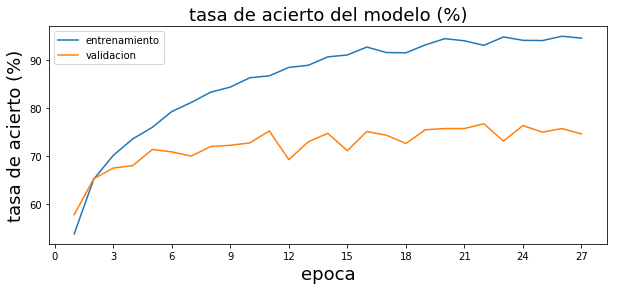

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 39s 20ms/step - loss: 0.1358 - acc: 0.9575 - val_loss: 1.3051 - val_acc: 0.7456

Epoch 00001: val_acc did not improve from 0.76808


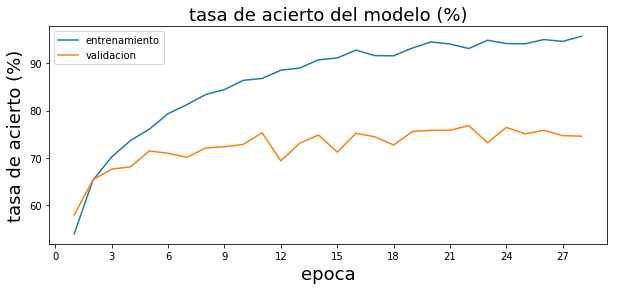

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 41s 20ms/step - loss: 0.1335 - acc: 0.9470 - val_loss: 1.2467 - val_acc: 0.7706

Epoch 00001: val_acc improved from 0.76808 to 0.77057, saving model to model_current_best_parte1.h5


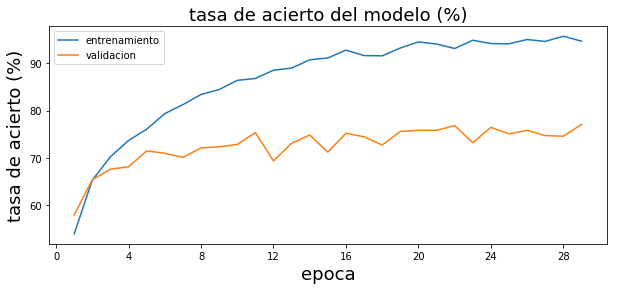

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 39s 20ms/step - loss: 0.1334 - acc: 0.9595 - val_loss: 1.1374 - val_acc: 0.7556

Epoch 00001: val_acc did not improve from 0.77057


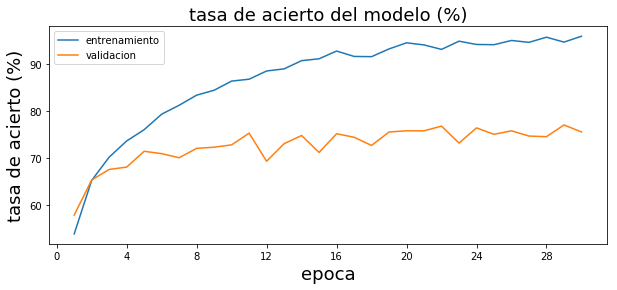

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 39s 20ms/step - loss: 0.1318 - acc: 0.9540 - val_loss: 1.4894 - val_acc: 0.7569

Epoch 00001: val_acc did not improve from 0.77057


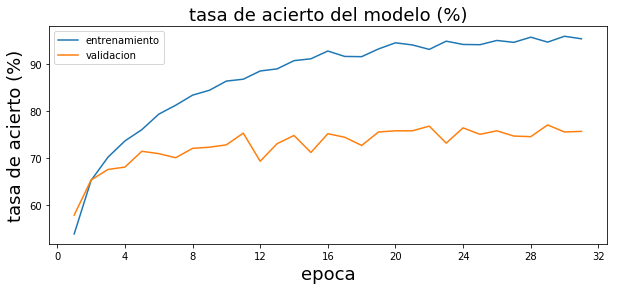

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 39s 20ms/step - loss: 0.1241 - acc: 0.9580 - val_loss: 1.5708 - val_acc: 0.7307

Epoch 00001: val_acc did not improve from 0.77057


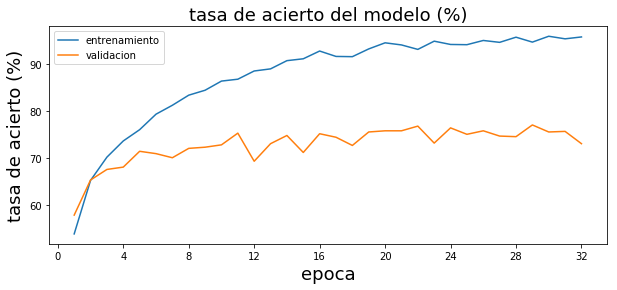

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 34s 17ms/step - loss: 0.1314 - acc: 0.9540 - val_loss: 1.2315 - val_acc: 0.7681

Epoch 00001: val_acc did not improve from 0.77057


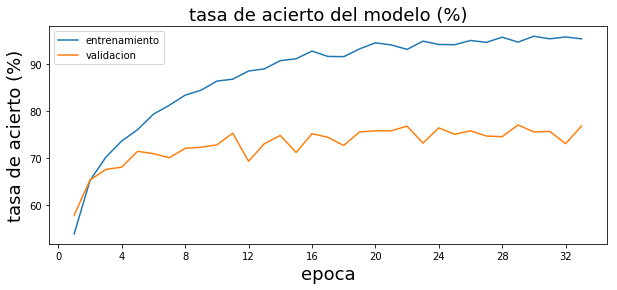

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 35s 18ms/step - loss: 0.1291 - acc: 0.9610 - val_loss: 1.2919 - val_acc: 0.7656

Epoch 00001: val_acc did not improve from 0.77057


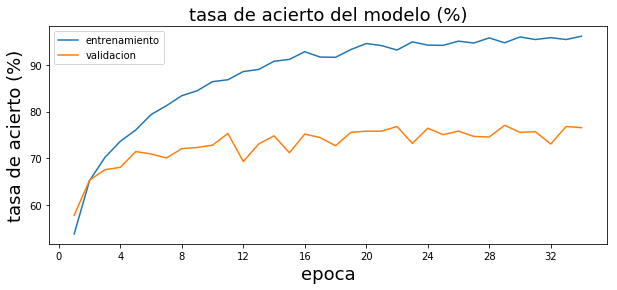

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 35s 17ms/step - loss: 0.1542 - acc: 0.9450 - val_loss: 1.1963 - val_acc: 0.7332

Epoch 00001: val_acc did not improve from 0.77057


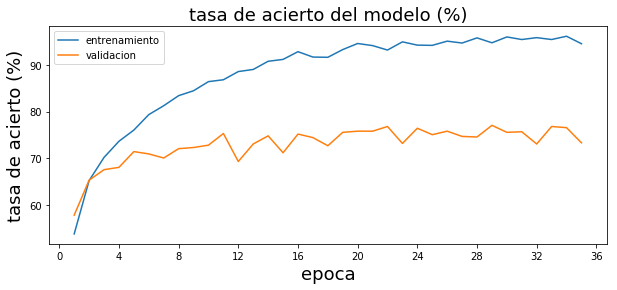

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 34s 17ms/step - loss: 0.1268 - acc: 0.9620 - val_loss: 1.0029 - val_acc: 0.7631

Epoch 00001: val_acc did not improve from 0.77057


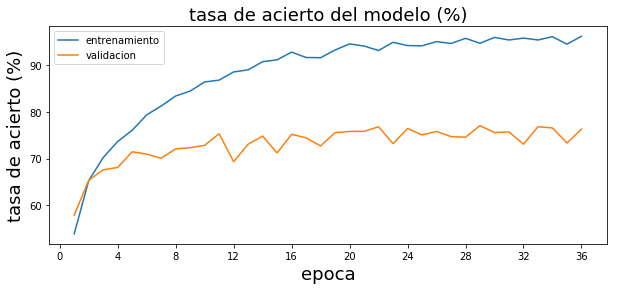

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 34s 17ms/step - loss: 0.1691 - acc: 0.9520 - val_loss: 1.4169 - val_acc: 0.7581

Epoch 00001: val_acc did not improve from 0.77057


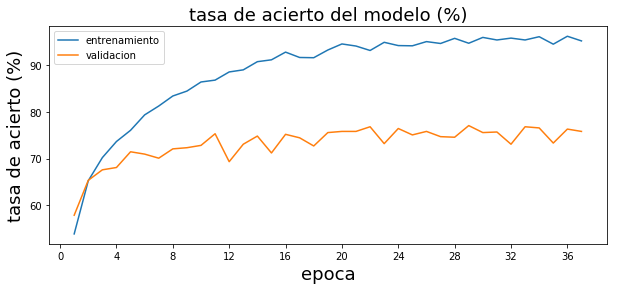

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 34s 17ms/step - loss: 0.1215 - acc: 0.9635 - val_loss: 1.2716 - val_acc: 0.7618

Epoch 00001: val_acc did not improve from 0.77057


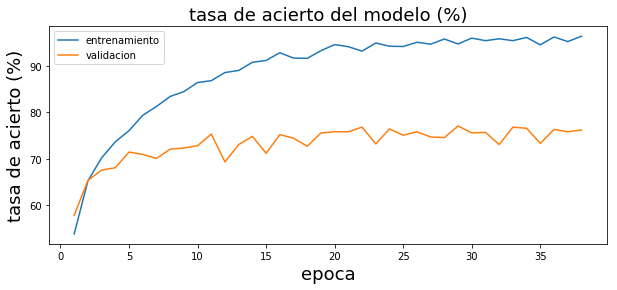

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 35s 17ms/step - loss: 0.1482 - acc: 0.9595 - val_loss: 1.3044 - val_acc: 0.7269

Epoch 00001: val_acc did not improve from 0.77057


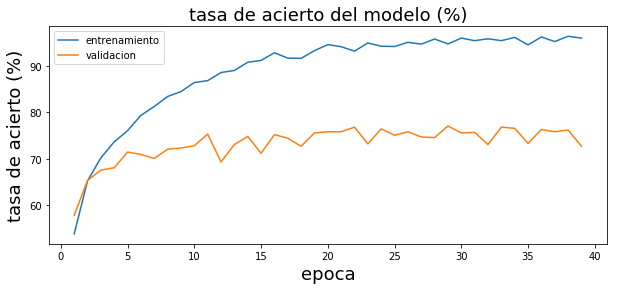

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 33s 17ms/step - loss: 0.1130 - acc: 0.9675 - val_loss: 1.1744 - val_acc: 0.7481

Epoch 00001: val_acc did not improve from 0.77057


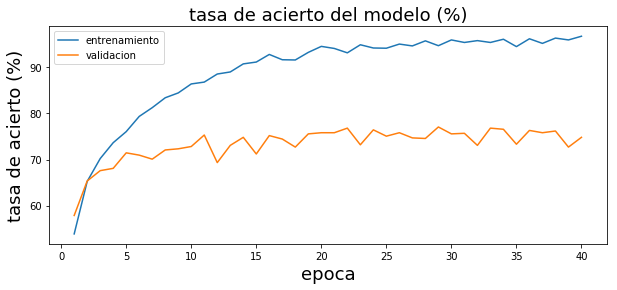

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 34s 17ms/step - loss: 0.1405 - acc: 0.9575 - val_loss: 1.3015 - val_acc: 0.7569

Epoch 00001: val_acc did not improve from 0.77057


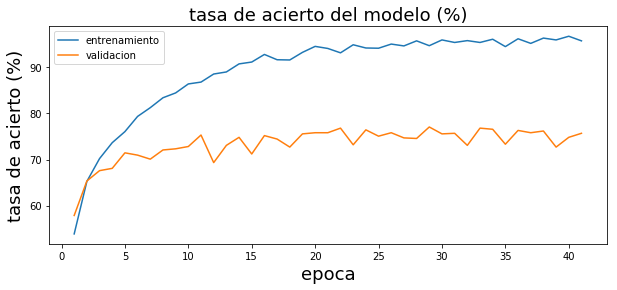

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 34s 17ms/step - loss: 0.1418 - acc: 0.9570 - val_loss: 1.0786 - val_acc: 0.7668

Epoch 00001: val_acc did not improve from 0.77057


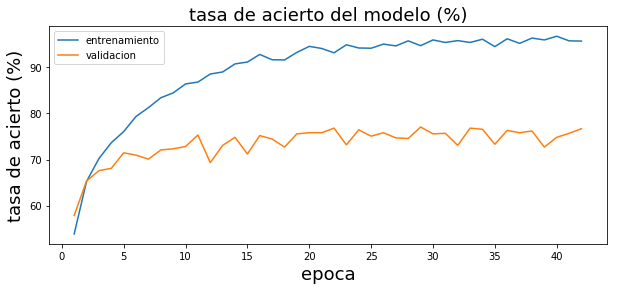

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 34s 17ms/step - loss: 0.1444 - acc: 0.9495 - val_loss: 1.4094 - val_acc: 0.7506

Epoch 00001: val_acc did not improve from 0.77057


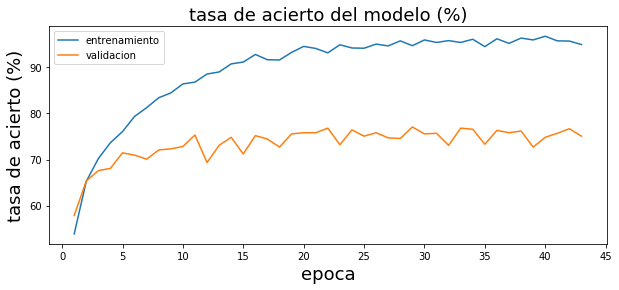

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 34s 17ms/step - loss: 0.1546 - acc: 0.9475 - val_loss: 1.4344 - val_acc: 0.7531

Epoch 00001: val_acc did not improve from 0.77057


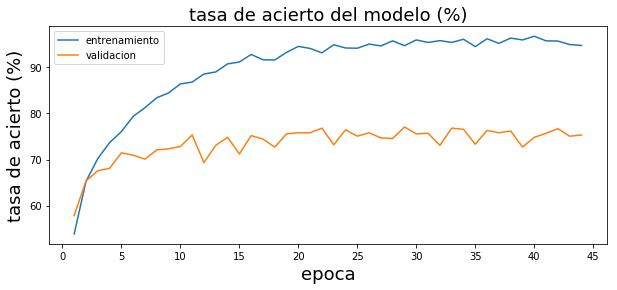

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 34s 17ms/step - loss: 0.1531 - acc: 0.9525 - val_loss: 1.2496 - val_acc: 0.7643

Epoch 00001: val_acc did not improve from 0.77057


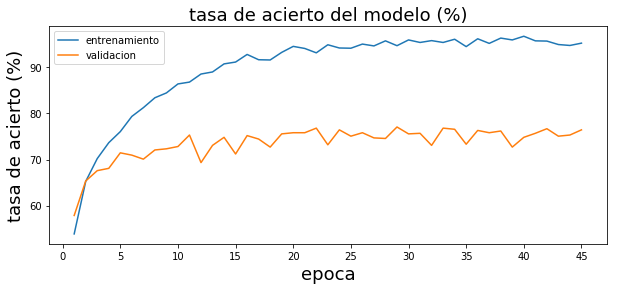

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 34s 17ms/step - loss: 0.1361 - acc: 0.9575 - val_loss: 1.0901 - val_acc: 0.7294

Epoch 00001: val_acc did not improve from 0.77057


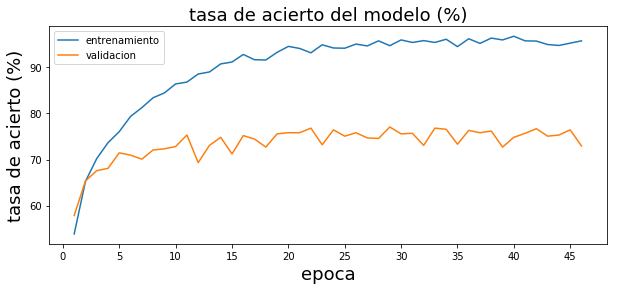

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 34s 17ms/step - loss: 0.1294 - acc: 0.9615 - val_loss: 0.9374 - val_acc: 0.7369

Epoch 00001: val_acc did not improve from 0.77057


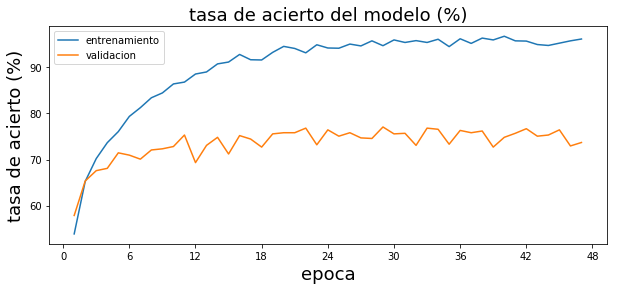

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 34s 17ms/step - loss: 0.1140 - acc: 0.9670 - val_loss: 1.7261 - val_acc: 0.7631

Epoch 00001: val_acc did not improve from 0.77057


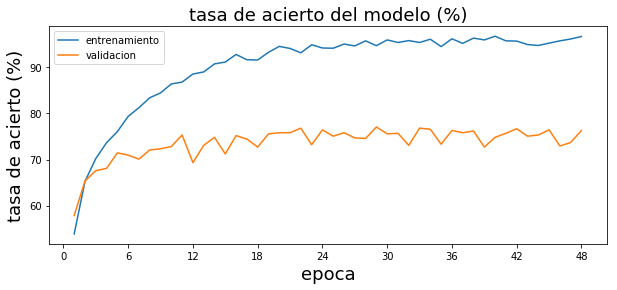

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 34s 17ms/step - loss: 0.1246 - acc: 0.9635 - val_loss: 1.4199 - val_acc: 0.7631

Epoch 00001: val_acc did not improve from 0.77057


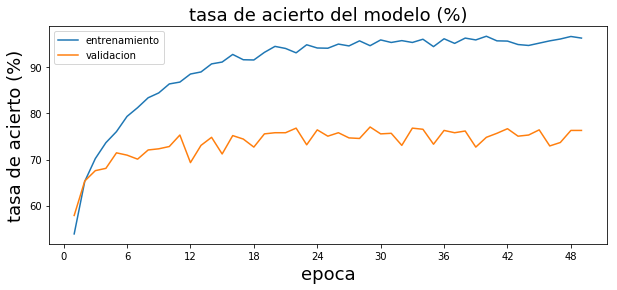

Train on 2000 samples, validate on 802 samples
Epoch 1/1
2000/2000 [==============================] - 35s 17ms/step - loss: 0.1053 - acc: 0.9655 - val_loss: 1.3214 - val_acc: 0.7731

Epoch 00001: val_acc improved from 0.77057 to 0.77307, saving model to model_current_best_parte1.h5


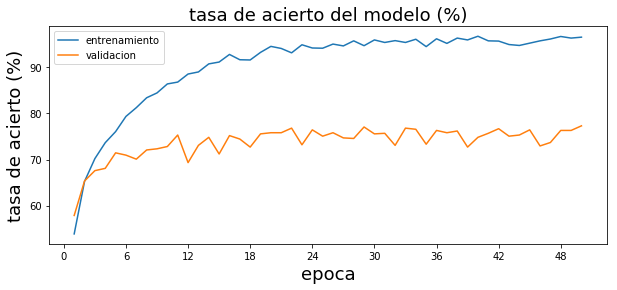

In [11]:
epochs = 50
batch_size = 16

filepath="model_current_best_parte1.h5"

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1,
                             save_best_only=True,
                             mode='max') # graba sólo los que mejoran en validación
callbacks_list = [checkpoint]
for e in range(epochs):
    history = model.fit(Xtr, ytr,
                        batch_size=batch_size,
                        epochs=1,
                        callbacks=callbacks_list,
                        verbose=1,
                        validation_data=(Xva, yva))
    
    acum_tr_acc = acum_tr_acc + history.history['acc']
    acum_val_acc = acum_val_acc + history.history['val_acc']
    
    if len(acum_tr_acc) > 1:
        grafica_entrenamiento(acum_tr_acc, acum_val_acc)

model = load_model('model_current_best_parte1.h5')

In [12]:
model = load_model('model_current_best_parte1.h5')

## Resultados obtenidos

In [13]:
score_tr = model.evaluate(Xtr, ytr, verbose=1)
print('Train loss    :', score_tr[0])
print('Train accuracy:', score_tr[1])

score_val = model.evaluate(Xva, yva, verbose=1)
print('Val loss    :', score_val[0])
print('Val accuracy:', score_val[1])

score_te = model.evaluate(Xte, yte, verbose=1)
print('Test loss     :', score_te[0])
print('Test accuracy :', score_te[1])

2000/2000 [==============================] - 14s 7ms/step
Train loss    : 0.02353091192804277
Train accuracy: 0.9985
802/802 [==============================] - 6s 7ms/step
Val loss    : 1.3213744537760863
Val accuracy: 0.773067331670823
2002/2002 [==============================] - 15s 7ms/step
Test loss     : 1.4067456443588455
Test accuracy : 0.7442557442557443
